#### **Import Library**

In [14]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

#### **Upload files**

In [15]:
uploaded = files.upload()

Saving pr_1991_2020_VNM.csv to pr_1991_2020_VNM.csv
Saving tas_1991_2020_VNM.csv to tas_1991_2020_VNM.csv


In [16]:
df_tAvg = pd.read_csv('tas_1991_2020_VNM.csv')
df_rainFall = pd.read_csv('pr_1991_2020_VNM.csv')

In [17]:
df_tAvg

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,21.0,1991,Jan Average,Vietnam,VNM
1,21.6,1991,Feb Average,Vietnam,VNM
2,23.6,1991,Mar Average,Vietnam,VNM
3,26.1,1991,Apr Average,Vietnam,VNM
4,27.4,1991,May Average,Vietnam,VNM
...,...,...,...,...,...
355,27.5,2020,Aug Average,Vietnam,VNM
356,27.0,2020,Sep Average,Vietnam,VNM
357,24.3,2020,Oct Average,Vietnam,VNM
358,23.7,2020,Nov Average,Vietnam,VNM


In [18]:
df_rainFall

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,28.1,1991,Jan Average,Vietnam,VNM
1,17.1,1991,Feb Average,Vietnam,VNM
2,41.6,1991,Mar Average,Vietnam,VNM
3,50.8,1991,Apr Average,Vietnam,VNM
4,134.1,1991,May Average,Vietnam,VNM
...,...,...,...,...,...
355,253.4,2020,Aug Average,Vietnam,VNM
356,267.0,2020,Sep Average,Vietnam,VNM
357,294.8,2020,Oct Average,Vietnam,VNM
358,150.3,2020,Nov Average,Vietnam,VNM


#### **Data Processing**

* Merge dataset

In [19]:
headers = ["tMin", "tMax", "tAvg", "rainfall"]
data = [df_tMin['tasmin'], df_tMax['tasmax'], df_tAvg['Temperature - (Celsius)'], df_rainFall['Rainfall - (MM)']]
df = pd.concat(data, axis=1, keys=headers)
df

,tMin,tMax,tAvg,rainfall
0,NaN,NaN,21.0,28.1
1,NaN,NaN,21.6,17.1
2,NaN,NaN,23.6,41.6
3,NaN,NaN,26.1,50.8
4,NaN,NaN,27.4,134.1
...,...,...,...,...
355,NaN,NaN,27.5,253.4
356,NaN,NaN,27.0,267.0
357,NaN,NaN,24.3,294.8
358,NaN,NaN,23.7,150.3


* Visualize dataset

In [20]:
X = df['tAvg']
Y = df['rainfall']
X = X.values.reshape(-1, 1)
Y = Y.values.reshape(-1, 1)

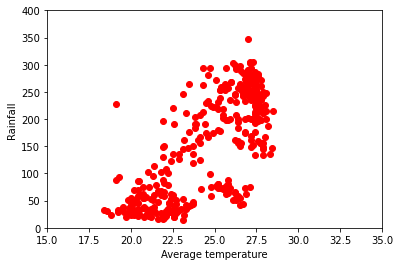

In [21]:
plt.plot(X, Y, 'ro')
plt.axis([15, 35, 0, 400])
plt.xlabel('Average temperature')
plt.ylabel('Rainfall')
plt.show()

#### **Train model**

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [23]:
model = Pipeline([('poly', PolynomialFeatures(degree=3, interaction_only=False)), ('linear', LinearRegression(fit_intercept=True))])
model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

* *Evaluation*

In [24]:
model.score(x_test, y_test)

0.5724424342518766

In [25]:
model.predict(x_test)

array([[222.88498642],
       [ 41.58844613],
       [195.05080752],
       [ 40.13845207],
       [221.81192033],
       [222.44978765],
       [223.122741  ],
       [221.81192033],
       [ 43.07494947],
       [221.80537546],
       [182.69562776],
       [182.69562776],
       [223.11135732],
       [223.11135732],
       [221.80537546],
       [175.9795533 ],
       [220.97754381],
       [222.44978765],
       [222.4759094 ],
       [146.67510046],
       [221.81192033],
       [197.87930444],
       [218.33138901],
       [ 59.57637938],
       [214.07359968],
       [223.11135732],
       [ 50.67615146],
       [179.37733147],
       [223.122741  ],
       [220.97754381],
       [ 40.29368224],
       [ 79.69821991],
       [100.81816971],
       [ 79.91715922],
       [219.9528174 ],
       [ 48.82212813],
       [221.81192033],
       [220.89521696],
       [221.81192033],
       [217.3569523 ],
       [223.11135732],
       [219.9528174 ],
       [158.014011  ],
       [ 42

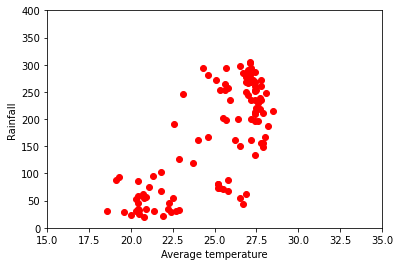

In [26]:
plt.plot(x_test, y_test, 'ro')
plt.axis([15, 35, 0, 400])
plt.xlabel('Average temperature')
plt.ylabel('Rainfall')
plt.show()

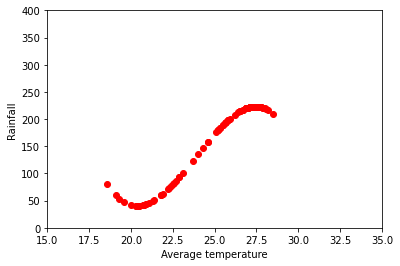

In [27]:
plt.plot(x_test, model.predict(x_test), 'ro')
plt.axis([15, 35, 0, 400])
plt.xlabel('Average temperature')
plt.ylabel('Rainfall')
plt.show()

* *Save model*

In [28]:
from pickle import dump
dump(model, open('model.pkl', 'wb'))

#### **Load model and test**

In [29]:
from pickle import load
model = load(open('model.pkl', 'rb'))

In [30]:
model.score(x_test, y_test)

0.5724424342518766

In [31]:
model.predict([[27]])

array([[220.97754381]])